# Calcul charging energy and level arm using Coulomb diamond

In [1]:
import sys, os, tempfile
import numpy as np
%matplotlib inline
%gui qt
import matplotlib.pyplot as plt
import qcodes

from qcodes.data.data_set import DataSet
import qtt
from qtt.measurements.scans import scanjob_t

from qtt.dataset_processing import slice_dataset

In [2]:
from qcodes.plots.qcmatplotlib import MatPlot

def plot_dataset(dataset: DataSet) -> None:
    """ Plot a dataset to matplotlib figure window

    Args:
        dataset: DataSet to be plotted
        scanjob: scanjob of the measurement
        save: Select if you want to save the plots

    """
    
    parameter_names = [name for name in dataset.arrays.keys() if not dataset.arrays[name].is_setpoint]
    #default_array = dataset.default_parameter_array()
    
    last_key = list(dataset.arrays.keys())[-1]
    default_array = dataset.arrays[last_key]
    
    # 2D plots
    if len(default_array.shape) >= 2:
        for idx, parameter_name in enumerate(parameter_names):
                plot_handle = MatPlot(dataset.arrays[parameter_name], num=idx)
                plot_handle.rescale_axis()


    # 1D plots        
    else:
        for idx, parameter_name in enumerate(parameter_names):
            plot_handle = MatPlot(dataset.arrays[parameter_name], num=idx)
            plot_handle.rescale_axis()

## Data 

In [3]:
# set data directory
path_save = r'K:\Yona\Measurements'
datadir = os.path.join(path_save, '20210224_10721_S22_TopRight_device')
DataSet.default_io = qcodes.data.io.DiskIO(datadir)

In [4]:
#open window with all the plots
logviewer = qtt.gui.dataviewer.DataViewer(data_directory=datadir, verbose=1)

findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 0.0%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 84.2%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 37.6%
DataViewer: found 368 files


Fetch the active dataset from the viewer

In [5]:
# use the plot select in the window for data
dataset = logviewer.dataset
print( dataset )

DataSet:
   location = 'K:\\Yona\\Measurements\\20210224_10721_S22_TopRight_device\\First cool down\\Coulomb diamond 1614258754.3135052'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | PM              | None         | (134,)
   Setpoint | VQD             | None         | (134, 27)
   Measured | dmm_curr_sensor | None         | (134, 27)


In [57]:
dataset.arrays['PM'].name='PM'
dataset.arrays['VQD'].name='BR'
dataset.arrays['dmm_curr_sensor'].name='dmm_curr_sensor'

In [58]:
dataset

DataSet:
   location = 'K:\\Yona\\Measurements\\20210224_10721_S22_TopRight_device\\2021-03-02\\11-00-01_qtt_2D_plot_coulomb_diamond'
   <Type>   | <array_id>      | <array.name>    | <array.shape>
   Setpoint | PM              | PM              | (100,)
   Setpoint | VQD             | BR              | (100, 40)
   Measured | dmm_curr_sensor | dmm_curr_sensor | (100, 40)

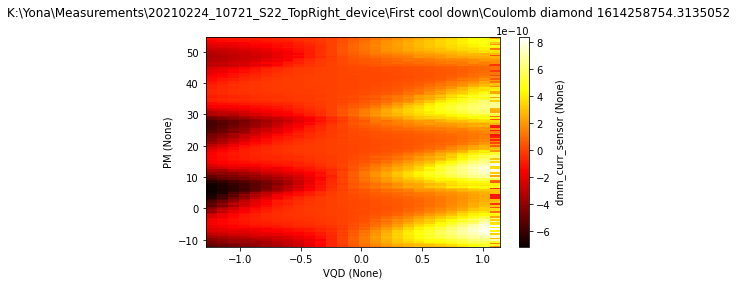

In [6]:
plot_dataset(dataset)

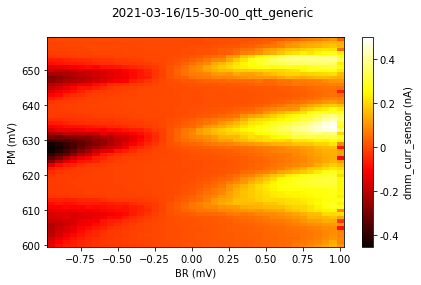

In [61]:
#select only a part of the data
loading_window = slice_dataset(dataset, window=[600, 660], axis=0, copy_metadata=True)
plot_dataset(loading_window)

In [64]:
loading_window

DataSet:
   location = '2021-03-16/15-30-29_qtt_generic'
   <Type>   | <array_id>      | <array.name>    | <array.shape>
   Measured | dmm_curr_sensor | dmm_curr_sensor | (100, 0)
   Setpoint | BR              | BR              | (100, 0)
   Setpoint | PM              | PM              | (100,)

ValueError: zero-size array to reduction operation fmax which has no identity

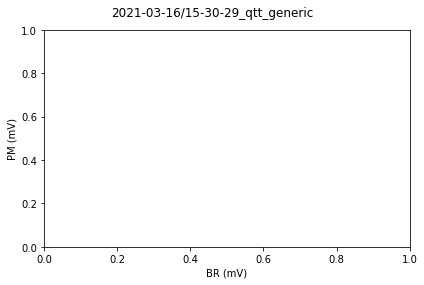

In [63]:
#select only a part of the data
loading_window = slice_dataset(dataset, window=[-0.5,0.5], axis=1, copy_metadata=True)
plot_dataset(loading_window)

In [10]:
loading_window

DataSet:
   location = '2021-03-16/15-10-56_qtt_generic'
   <Type>   | <array_id>      | <array.name>    | <array.shape>
   Measured | dmm_curr_sensor | dmm_curr_sensor | (50, 30)
   Setpoint | PM              | PM              | (50, 30)
   Setpoint | BR              | BR              | (50,)

In [50]:
# use the plot select in the window for data
dataset = logviewer.dataset
print( dataset )

DataSet:
   location = 'K:\\Yona\\Measurements\\20210224_10721_S22_TopRight_device\\2021-03-02\\10-41-25_qtt_2D_plot_BL_BR'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | BR              | None         | (80,)
   Setpoint | BL              | None         | (80, 80)
   Measured | dmm_curr_sensor | None         | (80, 80)


In [51]:
dataset.arrays['BL'].name='BL'
dataset.arrays['BR'].name='BR'
dataset.arrays['dmm_curr_sensor'].name='dmm_curr_sensor'

In [52]:
dataset

DataSet:
   location = 'K:\\Yona\\Measurements\\20210224_10721_S22_TopRight_device\\2021-03-02\\10-41-25_qtt_2D_plot_BL_BR'
   <Type>   | <array_id>      | <array.name>    | <array.shape>
   Setpoint | BR              | BR              | (80,)
   Setpoint | BL              | BL              | (80, 80)
   Measured | dmm_curr_sensor | dmm_curr_sensor | (80, 80)

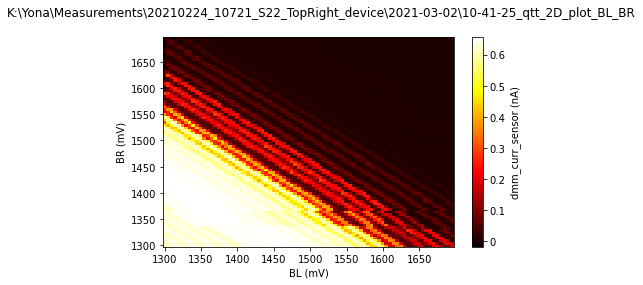

In [53]:
plot_dataset(dataset)

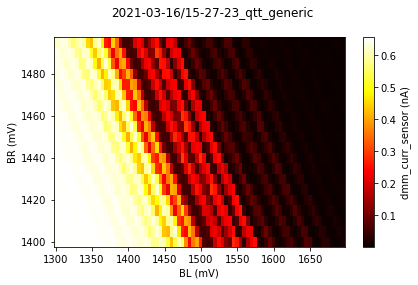

In [54]:
#select only a part of the data
loading_window = slice_dataset(dataset, window=[1400, 1500], axis=0, copy_metadata=True)
plot_dataset(loading_window)

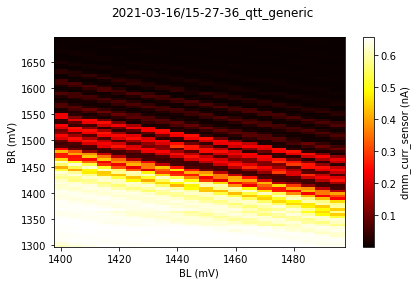

In [55]:
#select only a part of the data
loading_window = slice_dataset(dataset, window=[1400, 1500], axis=1, copy_metadata=True)
plot_dataset(loading_window)

ValueError: zero-size array to reduction operation fmax which has no identity

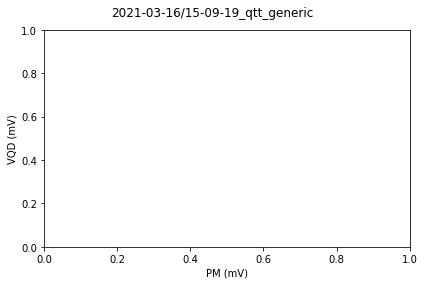

## Conversion DataArray-> Data

In [15]:
V_bias, PM= qtt.data.dataset1Ddata(dataset)

In [19]:
PM

DataArray[134,27]: dmm_curr_sensor
array([[ 1.96339400e-10,  5.07324151e-10,  4.47465910e-10, ...,
        -4.77696236e-10, -5.03625698e-10, -5.55109885e-10],
       [ 4.81068173e-10,  4.93044073e-10,  4.43845169e-10, ...,
        -4.63121858e-10, -4.84478608e-10, -5.07623432e-10],
       [ 1.56565083e-10,  5.31753446e-10,  5.37914429e-10, ...,
        -4.21173095e-10, -4.41126026e-10, -4.86791049e-10],
       ...,
       [ 4.81021539e-10,  4.69086188e-10,  4.49083748e-10, ...,
        -1.20671382e-10, -1.29427943e-10, -1.54843029e-10],
       [ 4.81038405e-10,  4.55447035e-10,  4.41981986e-10, ...,
        -1.13456677e-10, -1.13946010e-10, -1.29998825e-10],
       [ 2.36539573e-10,  4.55426413e-10,  4.27531256e-10, ...,
        -9.13202296e-11, -8.80865821e-11, -1.07255408e-10]])

In [8]:
dataset.arrays

{
  'PM': DataArray[134]: PM
    array([-12. , -11.5, -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,
            -7.5,  -7. ,  -6.5,  -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,
            -3. ,  -2.5,  -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,
             1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,
             6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ,
            10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5,
            15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,  19. ,
            19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,
            24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,  28. ,
            28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,  32. ,  32.5,
            33. ,  33.5,  34. ,  34.5,  35. ,  35.5,  36. ,  36.5,  37. ,
            37.5,  38. ,  38.5,  39. ,  39.5,  40. ,  40.5,  41. ,  41.5,
            42. ,  42.5,  43. ,  43.5,  44. ,  44.5,  45. ,  45.5,  46. ,
         

In [13]:
I=dataset.arrays['dmm_curr_sensor']

In [14]:
type(I)

qcodes.data.data_array.DataArray

## Conversion current -> conductance 

$G=\frac{I}{V_{QD}}$

### Real tension applied on QD

The voltage that we apply is not the one applied on the QD because there are other resitances.
$V_{QD}=V_{bias}-R_{elec}I$

In [19]:
R_filter=20*10**3 # Ohm
#R_refl=510*10**3 # Ohm
R_card=102*10**3 # Ohm
R_elec=R_filter+R_card # Ohm

In [104]:
#V_QD=[Vbias-R_elec*I[i] for i in range (0,len(I))]

In [16]:
len(I)

134

In [17]:
size(I)

NameError: name 'size' is not defined

In [18]:
np.size(I)

3618

In [20]:
for i in range (134):
    for j in range (27):
        V_bias[i,j]-=R_elec*I[i,j]

IndexError: too many indices for array

In [21]:
V_bias

DataArray[134]: PM
array([-12. , -11.5, -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,
        -7.5,  -7. ,  -6.5,  -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,
        -3. ,  -2.5,  -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,
         1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,
         6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ,
        10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5,
        15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,  19. ,
        19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,
        24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,  28. ,
        28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,  32. ,  32.5,
        33. ,  33.5,  34. ,  34.5,  35. ,  35.5,  36. ,  36.5,  37. ,
        37.5,  38. ,  38.5,  39. ,  39.5,  40. ,  40.5,  41. ,  41.5,
        42. ,  42.5,  43. ,  43.5,  44. ,  44.5,  45. ,  45.5,  46. ,
        46.5,  47. ,  47.5,  48. ,  48.5,  49. ,  49.5,  50. ,  50.5,
 